# Dendrogram from community detection by Girvan-Newman

In this notebook we will show how to use the method `dendrogram_from_girvan_newman.py` to plot a dendrogram from community detection performed by the Girvan-Newman algorithm.

The Girvan–Newman algorithm detects communities by progressively removing edges from the original graph. The algorithm removes the "most valuable" edge, traditionally the edge with the highest betweenness centrality, at each step. As the graph breaks down into pieces, the tightly knit community structure is exposed and the result can be depicted as a dendrogram.

Usually the `scipy.cluster.hierarchy.dendrogram` function is used to draw dendrograms.
It receives in input a matrix which encodes the hierarchical clustering to render as a dendrogram. For many cases it is enough to have this matrix generated by the `scipy.cluster.hierarchy.linkage` function, but not so, for example, in graph community detection.

The `dendrogram_from_girvan_newman` module provides functions that generate a matrix of this type (named `agglomerative matrix`) starting from the community reconstruction of a graph, performed with the 'girvan_newman' function  from `networkx.algorithms.community.centrality`. The `agglomerative matrix` is suitable to be taken in input by the `scipy.cluster.hierarchy.dendrogram` function.

In [1]:
import networkx as nx
import dendrogram_from_girvan_newman as dgn

In [2]:
# 1) Generate a simple network.

# nodes and edges
nodes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
edges = [(0, 1), (0, 10), (0, 11), (1, 3), (3, 2), (3, 4), (3, 5), (4, 2), 
         (4, 5), (5, 2), (5, 6), (5, 7), (5, 8), (8, 9)]

# graph
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

# info
nn = nx.number_of_nodes(G)
ne = nx.number_of_edges(G)
print ('The graph G has:\t %d nodes'%nn)
print ('The graph G has:\t %d edges'%ne)

The graph G has:	 12 nodes
The graph G has:	 14 edges


/home/francescobonacina/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/francescobonacina/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


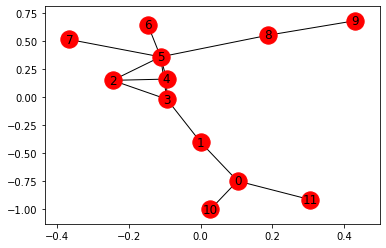

In [4]:
# 2) Draw the network.
nx.draw_networkx(G)

In [5]:
# 3) Perform community detection using Girvan-Newman.

# create the list of prtitions detected by Girvan-Newman
partitions = dgn.girvan_newman_partitions(G)

# print the list of partitions
for i, part in enumerate(partitions):
    print ('partition number %d:\t'%i, part)
    
print ('\nN.B: number of partitions: %d\t is equal to\t (number of nodes - 1): %d - 1'
      %(len(partitions), nn))

partition number 0:	 [{0, 1, 10, 11}, {2, 3, 4, 5, 6, 7, 8, 9}]
partition number 1:	 [{0, 1, 10, 11}, {2, 3, 4, 5, 6, 7}, {8, 9}]
partition number 2:	 [{0, 1, 10, 11}, {2, 3, 4, 5, 7}, {6}, {8, 9}]
partition number 3:	 [{0, 1, 10, 11}, {2, 3, 4, 5}, {6}, {7}, {8, 9}]
partition number 4:	 [{0, 10, 11}, {1}, {2, 3, 4, 5}, {6}, {7}, {8, 9}]
partition number 5:	 [{0, 11}, {1}, {2, 3, 4, 5}, {6}, {7}, {8, 9}, {10}]
partition number 6:	 [{0}, {1}, {2, 3, 4, 5}, {6}, {7}, {8, 9}, {10}, {11}]
partition number 7:	 [{0}, {1}, {2}, {3, 4, 5}, {6}, {7}, {8, 9}, {10}, {11}]
partition number 8:	 [{0}, {1}, {2}, {3}, {4, 5}, {6}, {7}, {8, 9}, {10}, {11}]
partition number 9:	 [{0}, {1}, {2}, {3}, {4}, {5}, {6}, {7}, {8, 9}, {10}, {11}]
partition number 10:	 [{0}, {1}, {2}, {3}, {4}, {5}, {6}, {7}, {8}, {9}, {10}, {11}]

N.B: number of partitions: 11	 is equal to	 (number of nodes - 1): 12 - 1


In [6]:
# 4) Create the 'agglomerative matrix' associated to the community detection.

# agglomerative matrix
agglomerative_mat = dgn.agglomerative_matrix(G, partitions)

print ('Agglomerative matrix:\n', agglomerative_mat)

Agglomerative matrix:
 [[ 8.  9.  1.  2.]
 [ 4.  5.  1.  2.]
 [ 3. 13.  2.  3.]
 [ 2. 14.  3.  4.]
 [ 0. 11.  1.  2.]
 [10. 16.  2.  3.]
 [ 1. 17.  3.  4.]
 [ 7. 15.  4.  5.]
 [ 6. 19.  5.  6.]
 [12. 20.  6.  8.]
 [18. 21.  7. 12.]]


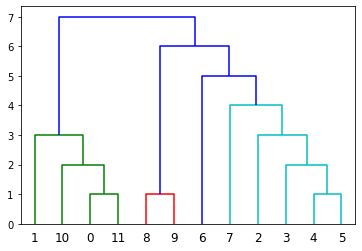

In [7]:
# 5) Use the 'agglomerative matrix' to plot the dendrogram. 
#    To do the plot use 'scipy.cluster.hierarchy.dendrogram'.

from scipy.cluster.hierarchy import dendrogram

# plot dendrogram
dendro = dendrogram(agglomerative_mat)

In [9]:
# 6) Find the 'best partitions' among all the partitions detected by Girvan-Newman.
#    The best partition is selected according to its modularity. 
#    (Using 'community_louvain.modularity' from 'community').

# best_partition, position of best partition in the list 'partitions'
bp_G, idx_bp_G = dgn.girvan_newman_best_partition(G, partitions)

print ('The best community partition of the graph G is:\n\t', bp_G)
print ('\nWhich is the one with index = %d among the partitions in the list "partitions".'
       %(idx_bp_G))

The best community partition of the graph G is:
	 {0: 0, 1: 0, 10: 0, 11: 0, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 2, 9: 2}

Which is the one with index = 1 among the partitions in the list "partitions".


The best partition splits the graph G into 3 communities.
The best partition, which splits the graph G into 3 communities, has a distance from the ground level equal to:	 6


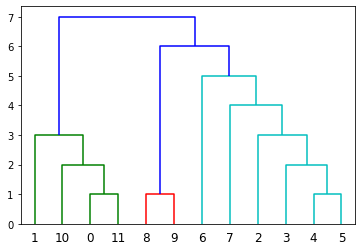

In [11]:
# Plot the dendrogram highlighting the best partition.

# How many communities in the best partition?
n_communities_bp = len(partitions[idx_bp_G])
print ('The best partition splits the graph G into %d communities.'%n_communities_bp)

# Distance of the best partition from the ground level
dist_bp = dgn.distance_of_partition(agglomerative_mat, n_communities_bp)
print ('The best partition, which splits the graph G into %d communities, has a distance from the ground level equal to:\t %d'
      %(n_communities_bp, dist_bp))

# Plot the dendrogram highlighting the communities which compose the best partition
dendro_bp = dendrogram(agglomerative_mat, color_threshold=dist_bp)